In [1]:
#https://medium.com/coinmonks/how-to-get-images-from-imagenet-with-python-in-google-colaboratory-aeef5c1c45e5

In [2]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib


import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline

import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

import os

[nltk_data] Downloading package wordnet to /Users/tyler/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [347]:
path = '/Users/tyler/Desktop/dissertation/programming/tcav/test_examples/zebra/img99.jpg'

os.path.exists(path)

False

## Get Image URLs

In [21]:
offset = 5890249
page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n0" + str(offset))

soup = BeautifulSoup(page.content, 'html.parser')
str_soup = str(soup)
split_urls=str_soup.split('\r\n')

print(len(split_urls))

1


In [3]:
def url_to_image(url):

    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
    return image

In [7]:
path = '/Users/tyler/Desktop/dissertation/programming/tcav/test_examples/zebra/img99.jpg'
im = cv2.imread(path)
print (type(im))

<class 'NoneType'>


(375, 500, 3)


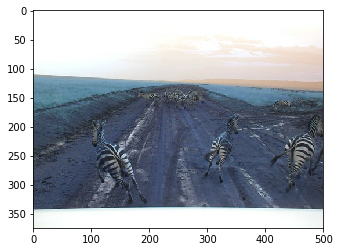

In [7]:
try:
    im = url_to_image(split_urls[6])
    h,w = im.shape[:2]
    print(im.shape)
    plt.imshow(im,cmap='gray')
    plt.show()
except:
    print('Error getting image')

In [ ]:
## Write to files
this_dir = '/Users/tyler/Desktop/dissertation/programming/tcav/concepts/zebra2'

img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

n_of_training_images = 10000

for progress in range(n_of_training_images):

    if(progress%20==0):
        print(progress)
    if not split_urls[progress] == None:
        try:
            I = url_to_image(split_urls[progress])
            if len(I.shape) == 3:
                save_path = os.path.join(this_dir,'img' + str(progress) + '.jpg')
                #print(save_path)
                cv2.imwrite(save_path,I)
        except:
                pass
                #print('Error getting image')

In [17]:
#save_path

## Dealing with labels

In [17]:
zebra = wn.synset_from_pos_and_offset('n', 2391049)
print(zebra)

Synset('zebra.n.01')


In [70]:
this_concept = wn.synsets('crossword_puzzle')
this_concept

[Synset('crossword_puzzle.n.01')]

In [71]:
idx = 0
this_concept[idx].offset()

6785654

In [72]:
num = this_concept[idx].offset()
if len(str(num))==7:
    wnid = 'n0' + str(num)
else:
    wnid = 'n' + str(num)
#wnid = 'n02784998'
url = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=' + wnid
page = requests.get(url)

soup = BeautifulSoup(page.content, 'html.parser')
str_soup = str(soup)
split_urls=str_soup.split('\r\n')

print(len(split_urls))

1218


In [41]:
split_urls

['http://i1.ce.cn/travel/news/lvwx/200912/23/W020091223340811454892.jpg',
 'http://farm3.static.flickr.com/2711/4065702992_2ef2a6834c.jpg',
 'http://1811.img.pp.sohu.com.cn/images/2010/8/31/15/21/12b7a4b806ag214.jpg',
 'http://farm4.static.flickr.com/3264/2400357640_82a5cb230f.jpg',
 'http://farm3.static.flickr.com/2764/4162660388_d3cce51d4d.jpg',
 'http://farm4.static.flickr.com/3229/2414895229_0d30429a27.jpg',
 'http://farm3.static.flickr.com/2077/2252252685_40e353b29c.jpg',
 'http://farm1.static.flickr.com/52/175039134_e0caea08ec.jpg',
 'http://farm3.static.flickr.com/2632/4070384167_05a3cdc07f.jpg',
 'http://farm1.static.flickr.com/67/197068259_d63c30b9bc.jpg',
 'http://farm3.static.flickr.com/2653/4064947861_8fb9e06cca.jpg',
 'http://re6.dv.ce.cn/comimage/2007-10-8/union_71058_855710.jpg',
 'http://farm3.static.flickr.com/2565/4065511388_a9caab4391.jpg',
 'http://farm4.static.flickr.com/3223/3006742424_fe9eb7f528.jpg',
 'http://farm1.static.flickr.com/151/415691720_c8aae2bfb9.jpg'

In [37]:
#split_urls

## From tar file

In [ ]:
import glob
import tarfile

In [ ]:
def untar(fname, targetd_dir):
    with tarfile.open(fname) as tar:
        tar.extractall(path=targetd_dir)

In [ ]:
images_dir = '/Users/tyler/Desktop/dissertation/programming/tcav/images/ILSVRC2013_DET_val.tar'
target_dir = '/Users/tyler/Desktop/dissertation/programming/tcav/images/ILSVRC2013_val_extracted'

In [ ]:
files = glob.glob(images_dir)

for f in files:
    untar(f, target_dir)

In [18]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib

import matplotlib.pyplot as plt
import numpy as np
import sys

import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

import os
import argparse




wnid = 'n02129165'
max_images = 5
img_dir = 'concepts/lion_sub_2'
progress_start = 10


# python get_images.py -wnid=n02391049 -img_dir=concepts/zebra3 -max_images=10

def url_to_image(url):

	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	return image


url = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=' + wnid
page = requests.get(url)

soup = BeautifulSoup(page.content, 'html.parser')

str_soup = str(soup)
split_urls = str_soup.split('\r\n')
total_images = len(split_urls)

img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

n_images = max_images if total_images > max_images else total_images


did_write = 0
progress = progress_start
#for progress in range(n_images):
while did_write < n_images:
	progress += 1
	

	save_path = os.path.join(img_dir,'img' + str(did_write + 1) + '.jpg')
	#if not split_urls[progress] == None:
	if not os.path.exists(save_path):
		try:
			I = url_to_image(split_urls[progress])
			if len(I.shape) == 3:
				
				did_write += 1
				if (did_write%20==0):
					print(did_write)
				
				cv2.imwrite(save_path,I)
				
		except:
				pass

print('wrote '+ str(did_write) + ' of ' + str(n_images) +' images')
print(f'ended on progress of {progress}')




[nltk_data] Downloading package wordnet to /Users/tyler/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


KeyboardInterrupt: 

In [22]:
split_urls

['http://animaldiversity.ummz.umich.edu/site/resources/kay_holekamp/Lioncarryingprey9_93.jpg/badge.jpg',
 'http://www.terrambiente.org/fauna/Mammiferi/carnivora/felidae/images/panthera_leojpg.jpg',
 'http://farm3.static.flickr.com/2401/1786650425_c8fc46fe65.jpg',
 'http://farm2.static.flickr.com/1008/539397898_27e52f3917.jpg',
 'http://ww.animaltrial.com/Resources/lionc.jpeg',
 'http://farm1.static.flickr.com/148/372374431_75890128d0.jpg',
 'http://www.cartinafinland.fi/kuvapankki/imagebank/29/29854_uploaded_thumb.jpg',
 'http://farm1.static.flickr.com/45/125036206_0c40fd25f0.jpg',
 'http://farm3.static.flickr.com/2297/2235273205_d8d9c3ce9e.jpg',
 'http://farm1.static.flickr.com/95/229465373_40c228e75d.jpg',
 'http://farm2.static.flickr.com/1239/969045737_d54c4e26df.jpg',
 'http://static.flickr.com/2064/1569097485_90539267fe.jpg',
 'http://farm1.static.flickr.com/193/519464866_0a50ab8d67.jpg',
 'http://www.meyers-naturfoto.de/bilder/loewe11.jpg',
 'http://farm1.static.flickr.com/123/42

In [21]:
progress

2105017